<a href="https://colab.research.google.com/github/Egret035/-win11-/blob/main/ML_FE_ANN_Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

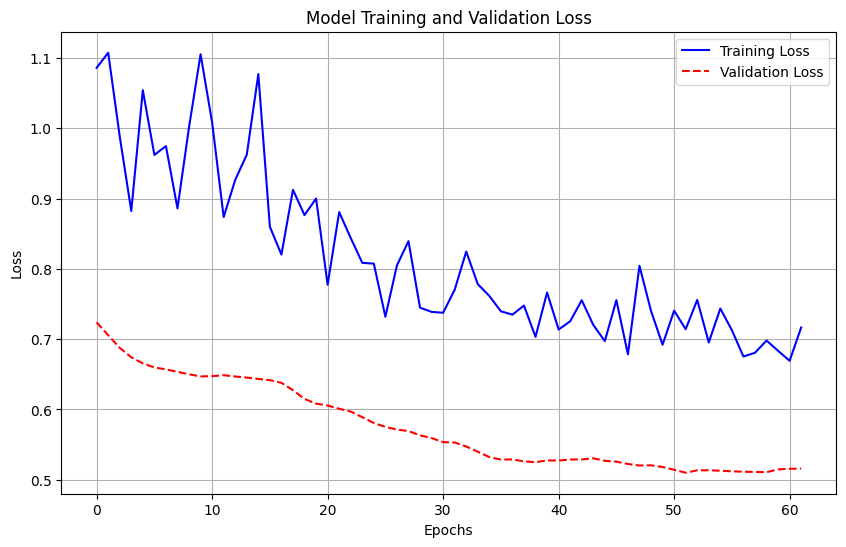

3/3 [==============================] - 0s 4ms/step
[[1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]
[[37  6]
 [ 4 21]]
Accuracy: 85.29%


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

df = pd.read_csv('Heart_Disease_Prediction.csv')

df.info()
df.describe()
df.isnull().sum()
# Get the duplicate rows
duplicate_rows = df[df.duplicated()]

# Print the duplicate rows
print(duplicate_rows)

X=df.iloc[:, :-1]
X.head()
y= df.iloc[:, -1]
y.head()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target column
y_encoded = label_encoder.fit_transform(y)
# Print the encoded values
print(y_encoded)

# Print the type of the encoded array
print(type(y_encoded))  # Should be <class 'numpy.ndarray'>

# Print the dtype of the encoded array
print(y_encoded.dtype)  # Should be int

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.25, random_state = 9)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu', kernel_initializer='he_normal', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(units=32, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(units=16, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(units=8, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
print(type(y_train))  # Check if it's a numpy array
print(y_train.dtype)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',       # The metric to monitor
    patience=10,              # Number of epochs with no improvement to wait before stopping
    restore_best_weights=True # Restore the model weights from the epoch with the best value of the monitored metric
)
history=ann.fit(X_train, y_train, batch_size = 40, epochs = 200, validation_split=0.2,  # Reserve 20% of training data for validation
    callbacks=[early_stopping])
# Extract loss values from the history
loss = history.history['loss']
import matplotlib.pyplot as plt

# Extract loss values from the history
loss = history.history['loss']
val_loss = history.history['val_loss']  # Validation loss for early stopping

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red', linestyle='--')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1

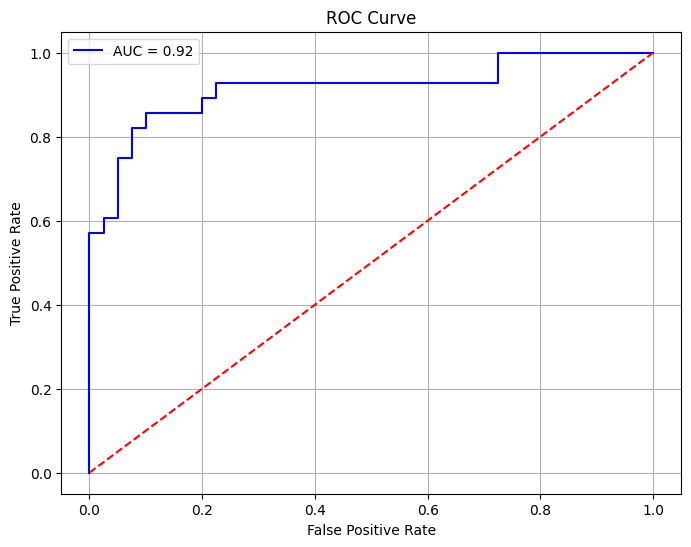

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('Heart_Disease_Prediction.csv')

# Inspect dataset
print("Dataset Info:")
print(df.info())
print("Missing Values:")
print(df.isnull().sum())
print("Duplicate Rows:")
print(df[df.duplicated()])

# Split features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Baseline Model: Logistic Regression
baseline_model = LogisticRegression(solver='liblinear', random_state=42)
baseline_model.fit(X_train, y_train)

# Predictions
baseline_y_pred = baseline_model.predict(X_test)
baseline_y_prob = baseline_model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
baseline_accuracy = accuracy_score(y_test, baseline_y_pred)
baseline_precision = precision_score(y_test, baseline_y_pred)
baseline_recall = recall_score(y_test, baseline_y_pred)
baseline_f1 = f1_score(y_test, baseline_y_pred)
baseline_auc_roc = roc_auc_score(y_test, baseline_y_prob)

print("\nBaseline Model Performance:")
print(f"Accuracy: {baseline_accuracy:.2f}")
print(f"Precision: {baseline_precision:.2f}")
print(f"Recall: {baseline_recall:.2f}")
print(f"F1-Score: {baseline_f1:.2f}")
print(f"AUC-ROC: {baseline_auc_roc:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, baseline_y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, baseline_y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {baseline_auc_roc:.2f}")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# ANN Metrics (Assuming already computed)
ann_accuracy = accuracy_score(y_test, y_pred)
ann_precision = precision_score(y_test, y_pred)
ann_recall = recall_score(y_test, y_pred)
ann_f1 = f1_score(y_test, y_pred)
ann_auc_roc = roc_auc_score(y_test, y_pred)

# Comparison Table
comparison = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"],
    "Logistic Regression (Baseline)": [baseline_accuracy, baseline_precision, baseline_recall, baseline_f1, baseline_auc_roc],
    "ANN (Deep Learning)": [ann_accuracy, ann_precision, ann_recall, ann_f1, ann_auc_roc]
})

print(comparison)


      Metric  Logistic Regression (Baseline)  ANN (Deep Learning)
0   Accuracy                        0.882353             0.852941
1  Precision                        0.884615             0.777778
2     Recall                        0.821429             0.840000
3   F1-Score                        0.851852             0.807692
4    AUC-ROC                        0.916071             0.850233
